# The Brain class

The Colliseum class is in charged of 

In [9]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image
%matplotlib qt

import sys
sys.path.insert(0, "..")  # Adds higher directory to python modules path.

from traphing.data_classes import Velas, Portfolio
from traphing import Brain
from traphing.strategies import Trade, Coliseum
from traphing.strategies.entry import EntryStrategy, CrossingMovingAverages, EarlySessionTrendFollower
from traphing.strategies.exit import ExitStrategy, StopLoss
from traphing import BacktestAnalysis

from traphing.utils import Timeframes, unwrap
import traphing.utils  as ul

from traphing.graph.Gl import gl

folder_images = "./images/python_generated/strategies/"

## Setting up a portfolio

Strategies work on porfolio objects, they are part of them.


In [10]:
symbol_names_list = ["AUDCHF", "AUDCAD"]
timeframes_list = [Timeframes.M15, Timeframes.D1]
portfolio_name = "my_portfolio"

storage_folder = "../tests/data/storage/"

portfolio = Portfolio(portfolio_name, symbol_names_list, timeframes_list)
portfolio.load_data_from_csv(storage_folder)

start_time = dt.datetime(2019,6,20); end_time = dt.datetime(2019,7,25)
portfolio.set_time_interval(start_time,end_time)

Size ../tests/data/storage/M15/AUDCHF_M15.csv:  100400  rows
Size ../tests/data/storage/D1/AUDCHF_D1.csv:  4894  rows
Size ../tests/data/storage/M15/AUDCAD_M15.csv:  99483  rows
Size ../tests/data/storage/D1/AUDCAD_D1.csv:  4963  rows


## Create a Coliseum object with two entry trading strategies

In [3]:
#### First strategy
symbol_name = symbol_names_list[0]
timeframe = timeframes_list[0]
portfolio_params = {"symbol_names_list":[symbol_name], "timeframes_list":[timeframe]}
slow_MA_params = {"symbol_name":symbol_name,"timeframe": timeframe,"indicator_name":"SMA", "args": {"n":50}}
fast_MA_params = {"symbol_name":symbol_name,"timeframe": timeframe,"indicator_name":"SMA", "args":{"n":30}}
indicators_params = {"fast_MA": fast_MA_params, "slow_MA": slow_MA_params}
exit_strategy_params = {"class_name":"TrailingStop",
                        "params":{"indicators":{"stop_loss_pct":0.1}}}
params = {"portfolio": portfolio_params, "indicators": indicators_params, "exit_strategy":exit_strategy_params}
entry_strategy1 = CrossingMovingAverages("Crossing averages", portfolio)
entry_strategy1.set_params(params)

#### Second strategy
symbol_name = symbol_names_list[1]
timeframe = timeframes_list[0]
portfolio_params = {"symbol_names_list":[symbol_name], "timeframes_list":[timeframe]}
indicators_params = {"time":dt.time(2)}
exit_strategy_params = {"class_name":"ExitTime",
                        "params":{"indicators":{"time":dt.time(15)}}}
params = {"portfolio": portfolio_params, "indicators": indicators_params, "exit_strategy":exit_strategy_params}
entry_strategy2 = EarlySessionTrendFollower("ESTF", portfolio)
entry_strategy2.set_params(params)

coliseum = Coliseum()
coliseum.add_entry_strategy(entry_strategy1)
coliseum.add_entry_strategy(entry_strategy2)

# The Brain Class

The Coliseum Class contains all the Entry and Exit strategies.

In [4]:
brain = Brain(coliseum, portfolio)

## Backtest Analysis


In [11]:
backtest_analysis = BacktestAnalysis(brain)
trade_analysis_df = backtest_analysis.backtest()

----- Performing Backtesting ---------
Period: 2019-06-20 - 2019-07-25
Total number of entry trade requests:  83

Req: 166: Exit_for_trade_Crossing averages#113#0. Time: 2019-07-25 pct time: 99.05%                                                                             

In [12]:
trade_analysis_df

,exit_name,symbol_name,gain,duration,entry_price,exit_price,entry_timestamp,exit_timestamp,ret,faked_exit_trade,list_index
entry_name,,,,,,,,,,,
trade_ESTF#0,trade_Exit_for_trade_ESTF#0#0,AUDCAD,-0.00224,13:00:00,0.91393,0.91169,2019-06-20 01:45:00,2019-06-20 14:45:00,-0.245095,False,0
trade_Crossing averages#0,trade_Exit_for_trade_Crossing averages#0#0,AUDCHF,-0.00076,01:00:00,0.68229,0.68153,2019-06-20 15:15:00,2019-06-20 16:15:00,-0.111390,False,1
trade_Crossing averages#1,trade_Exit_for_trade_Crossing averages#1#0,AUDCHF,0.00219,03:30:00,0.68150,0.67931,2019-06-20 17:00:00,2019-06-20 20:30:00,0.321350,False,2
trade_Crossing averages#2,trade_Exit_for_trade_Crossing averages#2#0,AUDCHF,0.00002,03:45:00,0.68020,0.68022,2019-06-21 05:15:00,2019-06-21 09:00:00,0.002940,False,3
trade_ESTF#1,trade_Exit_for_trade_ESTF#1#0,AUDCAD,0.00138,13:00:00,0.91258,0.91120,2019-06-21 01:45:00,2019-06-21 14:45:00,0.151220,False,4
...,...,...,...,...,...,...,...,...,...,...,...
trade_Crossing averages#112,trade_Exit_for_trade_Crossing averages#112#0,AUDCHF,-0.00069,04:45:00,0.68823,0.68892,2019-07-24 04:45:00,2019-07-24 09:30:00,-0.100257,False,161
trade_Crossing averages#111,trade_Exit_for_trade_Crossing averages#111#0,AUDCHF,-0.00083,07:15:00,0.68884,0.68801,2019-07-24 03:00:00,2019-07-24 10:15:00,-0.120492,False,162
trade_ESTF#50,trade_Exit_for_trade_ESTF#50#0,AUDCAD,0.00307,13:00:00,0.91961,0.91654,2019-07-24 01:45:00,2019-07-24 14:45:00,0.333837,False,163


In [13]:
#backtest_analysis.print_summary()
#backtest_analysis.print_gains()

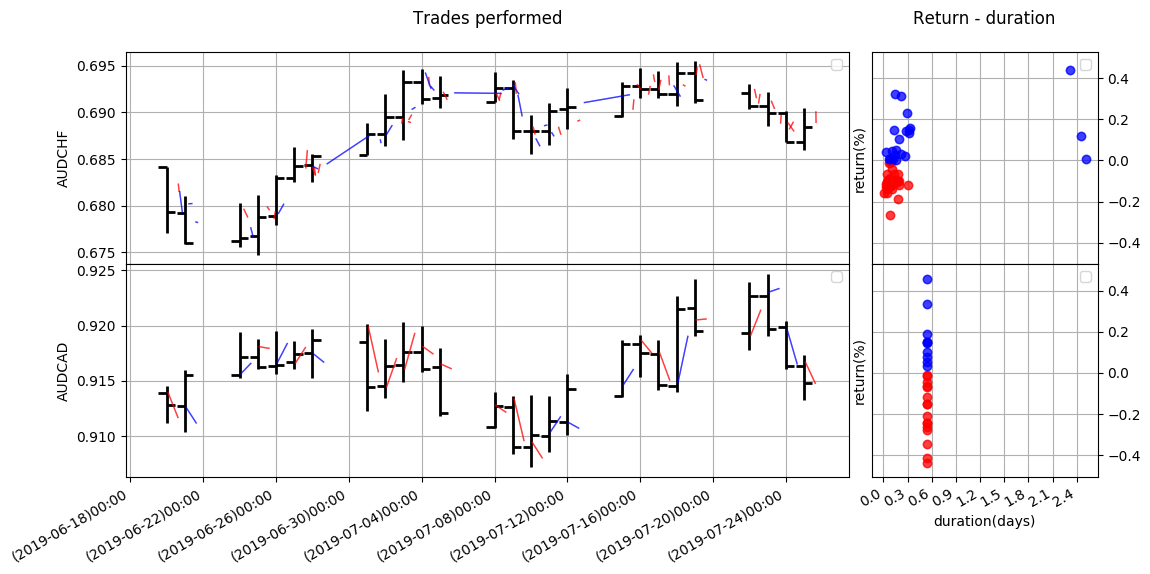

In [14]:
image_name = "backtest_strategies.png"; img_path = folder_images + image_name

symbol_names_list_plot = symbol_names_list
size_inches = [12, 5]
gl.init_figure()
n_rows, n_cols = len(symbol_names_list_plot),4

axes_list = [[],[]]
ax1, ax2 = None, None

for i in range (n_rows):
    ax1 = gl.subplot2grid((n_rows, n_cols),(i,0), sharex = ax1, colspan = n_cols-1)
    ax2 = gl.subplot2grid((n_rows, n_cols),(i,n_cols-1), sharex = ax2, sharey = ax2)
    ax2.yaxis.tick_right()
    
    symbol_name = symbol_names_list_plot[i]
    velas = portfolio[symbol_name][Timeframes.D1]
    
    velas.plot_barchart(axes = ax1, labels = ["Trades performed","",symbol_name], color = "k", lw = 2)
    backtest_analysis.plot_trades(ax1, symbol_name)
    
    backtest_analysis.plot_return_duration_scatter(ax2, symbol_name)
    axes_list[0].append(ax1); axes_list[1].append(ax2)

gl.subplots_adjust(left=.09, bottom=.10, right=.90, top=.95, wspace=.10, hspace=0, hide_xaxis = True, axes_by_columns = axes_list)
gl.save_figure(img_path, dpi = 100, size_inches = size_inches, close = True)
Image(img_path)